# Mini Projet Introduction au Deep Learning (Perceptron)
# Alexis Araujo

## Première Partie

In [499]:
#Importation des librairies
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

## Création du dataSet

In [500]:
# Définir le nombre d'échantillons (m) et le nombre de caractéristiques (n)
m = 100  # Le nombre d'étudiants souhaité
n = 2    # Nombre de caractéristiques (par exemple, notes en mathématiques et en français)

In [501]:
# Générer des données aléatoires pour les caractéristiques (notes)
X = np.random.randint(0, 21, size=(m, n))  # Génère m lignes avec n colonnes de notes aléatoires entre 0 et 20

In [502]:
# Définir les poids des caractéristiques (pondération)
# Par exemple, pour l'informatique, on peut attribuer un poids plus élevé aux matières scientifiques
weights = np.array([3, 2])  # Poids des caractéristiques (par exemple, [poids_math, poids_francais])


In [503]:
# Calculer la moyenne pondérée pour chaque étudiant
weighted_grades = np.dot(X, weights)
mean_weighted_grades = weighted_grades / np.sum(weights)  # Normalisation des moyennes pondérées


In [504]:
# Définir les résultats d'admission en fonction des moyennes pondérées
# Ici, les étudiants avec une moyenne pondérée supérieure ou égale à 10 sont admis (y=1), sinon non admis (y=0)
y = np.where(mean_weighted_grades >= 10, 1, 0)  # Création des labels d'admission


In [505]:
# Affichage des premières lignes du dataset et des résultats d'admission
print("Dataset X (caractéristiques des étudiants) :\n", X[:4])
print("\nRésultats d'admission y :\n", y[:4])

Dataset X (caractéristiques des étudiants) :
 [[ 1 20]
 [19 10]
 [15 18]
 [ 5 18]]

Résultats d'admission y :
 [0 1 1 1]


On peut voir ici un dataset X avec 2 colones et m lignes.
La 1er colonne sont les résultats en math de chaque étudiant
La 2ème colonne sont les résultats en francais de chaque étudiant

Chaque ligne représente 1 étudiant


Pour le tableau y dit si les étudiants ont été admis ou non
Chaque colonne correspond à un étudiant
0 il n'a pas été admis
1 il a été admis

In [506]:
y = y.reshape(y.shape[0], 1)
print(X.shape,y.shape)

(100, 2) (100, 1)


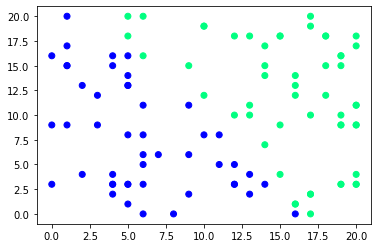

In [507]:
# Affichage de la dispersion de vos données
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter')
plt.show()

In [508]:
def initialisation(X):
    W=np.random.randn(X.shape[1],1)
    b=np.random.randn(1)
    return (W, b)

In [509]:
def model(X,W,b):
    Z=X.dot(W)+b
    A=1/(1+np.exp(-Z))
    return A

In [510]:
def logLoss(A,y):
    return 1/len(y)*np.sum(-y*np.log(A)-(1-y)*np.log(1-A))

In [511]:
def gradients (A,X,y):
    dW=1/len(y)*np.dot(X.T,A-y)
    db=1/len(y)*sum(A-y)
    return (dW,db)

In [512]:
def update(dW,db, W, b, learning_rate):
    W=W-learning_rate*dW
    b=b-learning_rate*db
    return (W,b)

In [513]:
def prediction(X,W,b):
    A=model(X,W,b)
    print(A)
    return A>=0.5

In [514]:
def perceptron(X, y, learning_rate=0.1, n_iter=100):
    W,b=initialisation(X)
    cout=[]
    for i in range(n_iter):
        A=model(X,W,b)
        cout.append(logLoss(A,y))
        dW,db=gradients(A,X,y)
        W,b= update(dW,db,W,b,learning_rate)
    y_pred=prediction(X,W,b)
    print(accuracy_score(y, y_pred))
    plt.plot(cout)
    plt.show()
    return (W,b)

[[0.0427445 ]
 [0.91895965]
 [0.69684022]
 [0.13096921]
 [0.22865456]
 [0.81888159]
 [0.92354797]
 [0.13893897]
 [0.11722815]
 [0.35702434]
 [0.94070087]
 [0.17134923]
 [0.11326928]
 [0.88581716]
 [0.33827712]
 [0.78576454]
 [0.12184271]
 [0.94640144]
 [0.05122048]
 [0.83885183]
 [0.80550901]
 [0.88383875]
 [0.63757314]
 [0.95865643]
 [0.86288987]
 [0.72389118]
 [0.90409044]
 [0.78817745]
 [0.79540587]
 [0.46245216]
 [0.04195714]
 [0.28020345]
 [0.89206154]
 [0.69272327]
 [0.16255226]
 [0.6885754 ]
 [0.27144519]
 [0.84787046]
 [0.92354797]
 [0.91602053]
 [0.62738071]
 [0.81522915]
 [0.14605447]
 [0.50372053]
 [0.89976826]
 [0.55223287]
 [0.57134814]
 [0.21768845]
 [0.88581716]
 [0.94070087]
 [0.22865456]
 [0.28020345]
 [0.29717763]
 [0.91602053]
 [0.09064301]
 [0.22101282]
 [0.67484989]
 [0.94640144]
 [0.93323649]
 [0.48916159]
 [0.08366902]
 [0.35143474]
 [0.80244944]
 [0.69789996]
 [0.59267953]
 [0.72389118]
 [0.35587247]
 [0.86799573]
 [0.95865643]
 [0.92525555]
 [0.31055842]
 [0.65

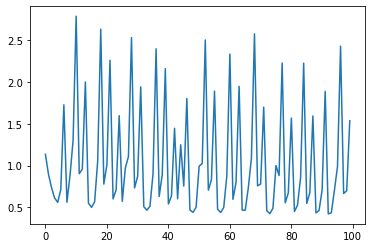

In [515]:
W, b = perceptron(X, y)

In [516]:
nouvellePlante=np.array([2,1])
x0=np.linspace(-1,4,100)
x1 = (-b - W[0] * x0) / W[1]

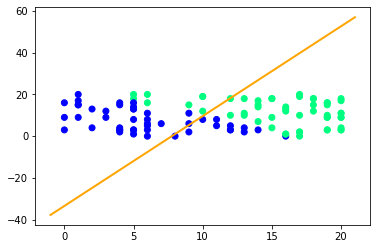

In [517]:
# Génération des valeurs x0 pour tracer la droite de décision
x0 = np.linspace(min(X[:, 0]) - 1, max(X[:, 0]) + 1, 100)

# Calcul de x1 en utilisant les poids et le biais pour tracer la frontière de décision
x1 = (-b - W[0] * x0) / W[1]

# Affichage du dataset et de la frontière de décision
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter')
plt.plot(x0, x1, c='orange', lw=2)
plt.show()

In [518]:
prediction(nouvellePlante, W,b)

[0.16323698]


array([False])